In [1]:
# correlation of m_bl^minimax with truth (t)

In [2]:
import sys, os
sys.path.append(os.path.abspath("/afs/desy.de/user/z/zhuxinyu/public/mass_reco/"))
import numpy as np
import ROOT
from ROOT import TCanvas, TLegend, TFile, TPaveLabel, TPaveText, TTree, TLorentzVector, TH1D, TVectorT, gStyle, THStack, gPad, TH2D
from ROOT import gROOT
import helper
import math
import time
start_time = time.time()


Welcome to JupyROOT 6.24/08


In [3]:
file = TFile("../output.root")
tree = file.Get("nominal")

In [4]:
m_bl1D = TH1D ("m_bl ","invariant mass of bl pair by truth match" ,50 ,0 ,300)
m_bl1D_minimax = TH1D ("m_bl_minimax","invariant mass of bl pair by minimax" ,50 ,0 ,300)
# 2D hists
bl_t = TH2D("bl_t", "mass of bl_{minimax}^{reco} vs bl^{truth}", 50, 0, 180, 50, 0 ,180)

In [5]:
# for n in range(tree.GetEntries()):
for n in range(250000):
    if (not(n % 10000)): 
        print("event:", n, "--- %.2f seconds ---" % (time.time() - start_time))

    tree.GetEntry(n)
    # construct p4 vector 
    ## truth level llbb
    p4s_truth_b = []
    p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(tree, "MC_b_from_t"))
    p4s_truth_b.append(helper.p4_from_pt_eta_phi_m(tree, "MC_b_from_tbar"))
    # first element from t, second element from tbar
    ## lepton (el/mu/tau)
    prefixes = ['MC_Wdecay1_from_t', 'MC_Wdecay2_from_t', 'MC_Wdecay1_from_tbar','MC_Wdecay2_from_tbar']
    p4s_truth_lep = helper.get_leptons_from_truth(prefixes, tree)
    ## nominal level llbb (same as in minimax_lb.ipynb)
    p4s_lep = helper.GetLorenzP4List(tree, 'lep')
    p4s_bjet = helper.GetLorenzP4List(tree,'bjet')

    #------------------------------------------------------------------#

    # dR match p4 vector: p4s_lep vs p4s_truth_lep; p4s_bjet vs p4s_truth_b
    ## arrange the p4s as [from_b , from_bbar]
    if len(p4s_truth_lep)*len(p4s_lep)*len(p4s_truth_b)*len(p4s_bjet) == 0: continue
    p4s_match_lep = helper.deltaR_match(p4s_truth_lep, p4s_lep, 0.4)
    p4s_match_bjet = helper.deltaR_match(p4s_truth_b, p4s_bjet, 0.4)

    if len(p4s_match_lep)*len(p4s_match_bjet) != 0 :

        # draw the correct combination
        m1 = (p4s_match_lep[0] + p4s_match_bjet[0]).M()/1000
        m2 = (p4s_match_lep[1] + p4s_match_bjet[1]).M()/1000
        m_bl1D.Fill(m1)
        m_bl1D.Fill(m2)

        ## minimax
        if len(p4s_lep) ==2 and len(p4s_bjet) == 2:
            idx_l, idx_b = helper.minimax_cross(p4s_lep, p4s_bjet)
            m_bl1D_minimax.Fill((p4s_lep[idx_l] + p4s_bjet[idx_b]).M()/1000)
            m_bl1D_minimax.Fill((p4s_lep[1 - idx_l] + p4s_bjet[1 - idx_b]).M()/1000)




event: 0 --- 0.37 seconds ---
event: 10000 --- 12.46 seconds ---
event: 20000 --- 23.79 seconds ---
event: 30000 --- 35.10 seconds ---
event: 40000 --- 46.43 seconds ---
event: 50000 --- 57.89 seconds ---
event: 60000 --- 69.32 seconds ---
event: 70000 --- 80.79 seconds ---
event: 80000 --- 92.46 seconds ---
event: 90000 --- 103.85 seconds ---
event: 100000 --- 115.19 seconds ---
event: 110000 --- 126.61 seconds ---
event: 120000 --- 138.32 seconds ---
event: 130000 --- 149.70 seconds ---
event: 140000 --- 161.06 seconds ---
event: 150000 --- 172.57 seconds ---
event: 160000 --- 184.19 seconds ---
event: 170000 --- 195.83 seconds ---
event: 180000 --- 207.31 seconds ---
event: 190000 --- 218.45 seconds ---
event: 200000 --- 229.63 seconds ---
event: 210000 --- 241.06 seconds ---
event: 220000 --- 252.65 seconds ---
event: 230000 --- 264.01 seconds ---
event: 240000 --- 275.58 seconds ---


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


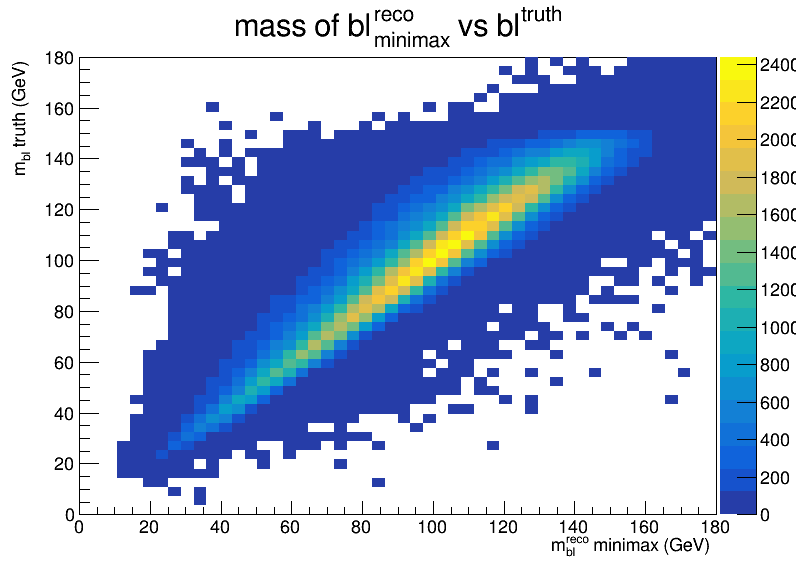

In [8]:
c2 = TCanvas('c2', 'canvas2', 0, 0, 800, 600 )

bl_t.Draw("COLZ")
bl_t.SetStats(0)
bl_t.GetXaxis().SetTitle("m_{bl}^{reco} minimax (GeV)")
bl_t.GetYaxis().SetTitle("m_{bl} truth (GeV)")

c2.Draw()